### 4. مقایسه درآمد افرادی شهری در سال های 1400 و 1401

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def get_total_job_income(df, member_id):
    return df[df['Member_id'] == member_id]['netincome_w_y'].apply(to_int).sum()


def get_total_free_income(df, member_id):
    return df[df['Member_id'] == member_id]['income_s_y'].apply(to_int).sum()


def get_total_subsidy_income(df, member_id):
    return df[df['Member_id'] == member_id]['subsidy'].apply(to_int).sum()


def to_int(num):
    try:
        if type(num) == str:
            num = num.strip()
        return int(num)
    except Exception as e:
        return 0


def get_total_other_income(record):
    total_income = 0

    total_income += to_int(record['income_pension'])
    total_income += to_int(record['income_rent'])
    total_income += to_int(record['income_interest'])
    total_income += to_int(record['income_aid'])
    total_income += to_int(record['income_resale'])
    total_income += to_int(record['income_transfer'])

    return total_income


def get_total_income(df, member_id):
    return df[df['Member_id'] == member_id]['income'].apply(to_int).sum()


def calc_total_person_income(file_name):
    df_job_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S01')

    df_job_income = df_job_income[(~np.isnan(df_job_income['Address'])) & (~np.isnan(df_job_income['member']))]
    df_job_income['Member_id'] = df_job_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_job_income['income'] = df_job_income.apply(lambda r: get_total_job_income(df_job_income, r['Member_id']), axis=1)
    df_job_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_job_income = df_job_income[['Member_id', 'income']]

    df_free_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S02')

    df_free_income = df_free_income[(~np.isnan(df_free_income['Address'])) & (~np.isnan(df_free_income['member']))]
    df_free_income['Member_id'] = df_free_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_free_income['income'] = df_free_income.apply(lambda r: get_total_free_income(df_free_income, r['Member_id']), axis=1)
    df_free_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_free_income = df_free_income[['Member_id', 'income']]
    
    df_other_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S03')

    df_other_income.fillna(0, inplace=True)
    df_other_income = df_other_income[(~np.isnan(df_other_income['Address'])) & (~np.isnan(df_other_income['member']))]
    df_other_income['Member_id'] = df_other_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_other_income['income'] = df_other_income.apply(lambda r: get_total_other_income(r), axis=1)
    df_other_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_other_income = df_other_income[['Member_id', 'income']]
    
    df_subsidy_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S04')

    df_subsidy_income = df_subsidy_income[(~np.isnan(df_subsidy_income['Address'])) & (~np.isnan(df_subsidy_income['member']))]
    df_subsidy_income['Member_id'] = df_subsidy_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_subsidy_income['income'] = df_subsidy_income.apply(lambda r: get_total_subsidy_income(df_subsidy_income, r['Member_id']), axis=1)
    df_subsidy_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_subsidy_income = df_subsidy_income[['Member_id', 'income']]

    df_income = pd.concat([df_job_income, df_free_income, df_other_income, df_subsidy_income])
    
    return df_income

In [31]:
U1400 = calc_total_person_income('U1400.xlsx')
U1400_income = U1400.groupby('Member_id').agg({'income': 'sum'})
U1400_income = U1400_income['income'].values

In [32]:
U1401 = calc_total_person_income('U1401.xlsx')
U1401_income = U1401.groupby('Member_id').agg({'income': 'sum'})
U1401_income = U1401_income['income'].values

In [34]:
U1400_income.mean(), U1401_income.mean()

(235215582.0052185, 378516110.72378343)

In [35]:
U1400_income.std(), U1401_income.std()

(393554946.75185376, 615398339.4857981)

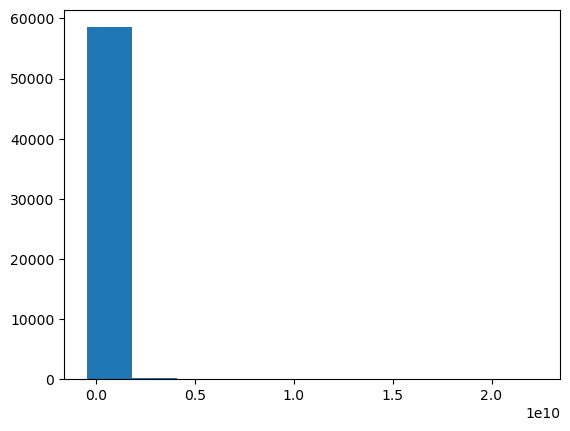

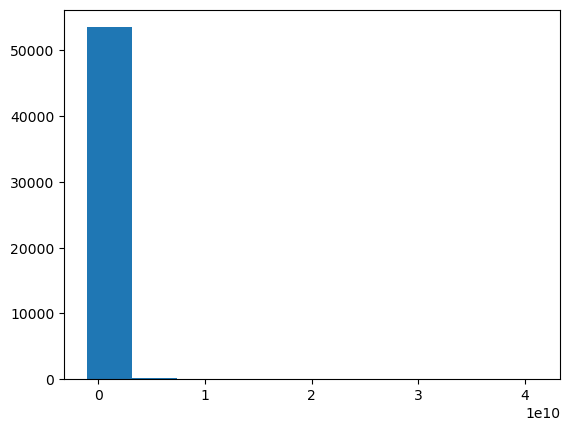

In [36]:
plt.hist(U1400_income)
plt.show()
plt.hist(U1401_income)
plt.show()

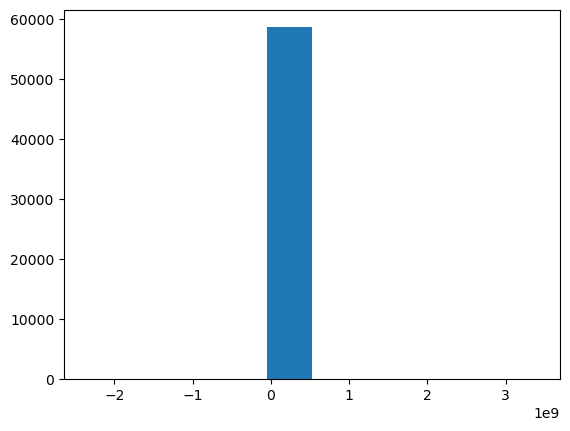

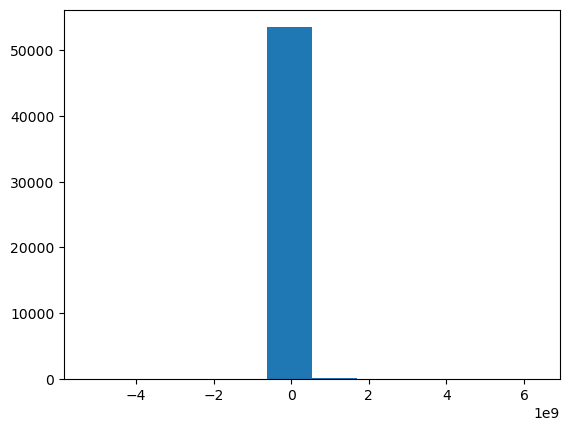

In [37]:
from scipy import stats

U1400_income_normal, _ = stats.yeojohnson(U1400_income)
U1401_income_normal, _ = stats.yeojohnson(U1401_income)

plt.hist(U1400_income_normal, bins=10)
plt.show()
plt.hist(U1401_income_normal, bins=10)
plt.show()

In [39]:
from scipy.stats import shapiro

shapiro(U1400_income_normal), shapiro(U1401_income_normal)

c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 58829.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 53697.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.6183707941270489, pvalue=4.8514647450574087e-138),
 ShapiroResult(statistic=0.5983127118107952, pvalue=3.982697200434836e-137))

چون داده های همچنان نرمال نیستند، پس باید از روش آماری دیگری برای بررسی این سوال استفاده کرد

In [40]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(U1400_income, U1401_income)
u_stat, p_value

(1281381182.0, 0.0)

چون مقدار پی برابر با صفر محاسبه شده است نشان می دهد که فرض اولیه ما اشتباه بوده است و در نتیجه درآمد این دو سوال در مناطق شهری با یکدیگر برابر نمی باشد